## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl #graphics
#graphics wide functionality
import seaborn as sb 
#Stohastic gradient descent (Classifier)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
# to estimate accuracy, 
from sklearn.metrics import roc_auc_score, plot_roc_curve
# number of certain elements in array
from collections import Counter

from IPython.display import display, HTML
mpl.rcParams['figure.figsize'] = (8, 8)

## Loading .csv

In [5]:
file = 'application_{}.csv'
train = pd.read_csv(file.format('train'))
test = pd.read_csv(file.format('test'))

In [6]:
train.head() #first data in dataset, target - те що має бути при класифікації (відсутнє в test)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.shape

(307511, 122)

In [9]:
test.shape

(48744, 121)

## Data description

In [10]:
Descrip = pd.read_csv("HomeCredit_columns_description.csv", index_col=0, encoding='unicode_escape')
Descrip = Descrip[Descrip['Table'] == "application_{train|test}.csv"]
Descrip.head() #дізнаємося, що робить кожна колонка

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [11]:
for column in train.columns:
    display(HTML(f"<b>{column}</b>: <span>{Descrip[Descrip['Row'] == column]['Description'].iloc[0]}</span>"))

In [12]:
#статистика, count - кількість значень, mean - середнє, std - середнє відхилення
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
#порівнюємо з тестовими даними, найважливіші тут meam та std, відрізняються не суттєво
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


## Put NaN new value

In [14]:
NAN = train.isna().to_numpy()
NanNewValue = pd.DataFrame()
NanNewValue['column'] = train.columns
NanNewValue['NAN_value'] = np.zeros_like(len(NanNewValue))

for col in range(NAN.shape[1]):
    column_values = NAN[:,col]
    NAN_value = len(column_values[column_values == True]) / NAN.shape[0]
    NanNewValue['NAN_value'][col] = NAN_value
    
NanNewValue

<ipython-input-14-fe8eb0b5237f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NanNewValue['NAN_value'][col] = NAN_value


,column,NAN_value
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,0
118,AMT_REQ_CREDIT_BUREAU_WEEK,0
119,AMT_REQ_CREDIT_BUREAU_MON,0
120,AMT_REQ_CREDIT_BUREAU_QRT,0


In [15]:
# missing values заповнимо останніми знайденими не NAN значеннями
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

## Distribution

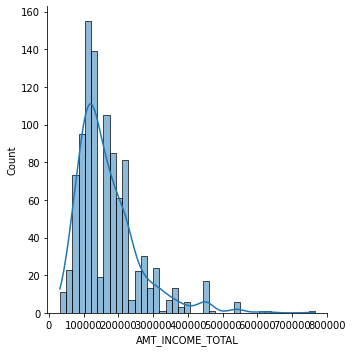

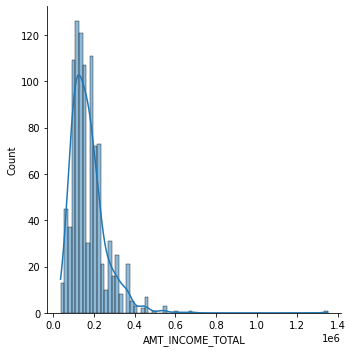

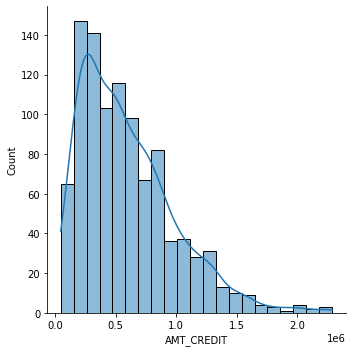

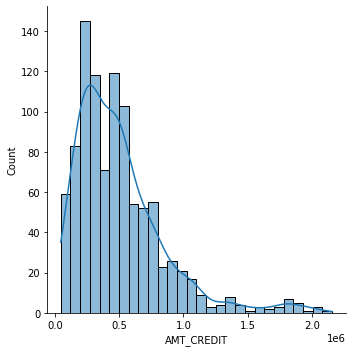

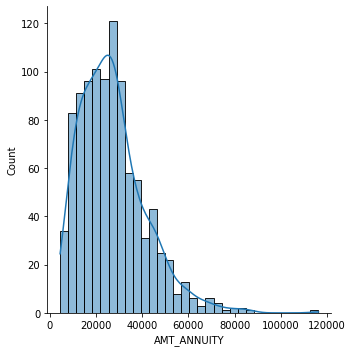

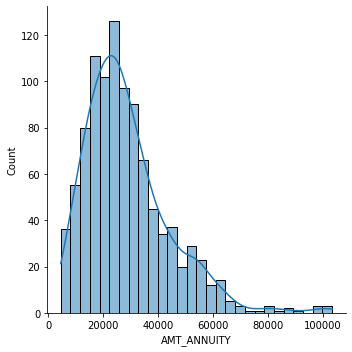

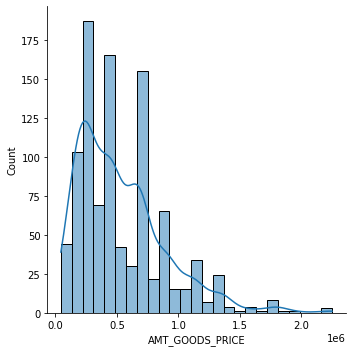

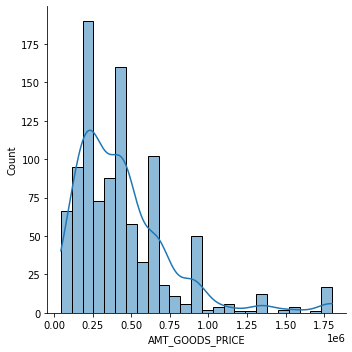

In [16]:
#шукаємо залежність між даними, перше - усі АМТ колонки, їх дані мають впливати найбільше
AMT_data = list(filter(lambda col: col.startswith('AMT') and "BUREAU" not in col, train.columns))
for colname in AMT_data:
    ax = sb.displot(train[colname][:1000], kde=True)
    sb.displot(test[colname][:1000], kde=True)



<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

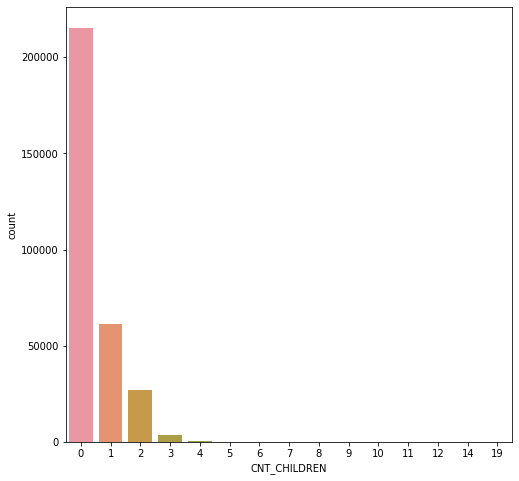

In [17]:
# виплата від кількості дітей
sb.countplot(x='CNT_CHILDREN', data=train)


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

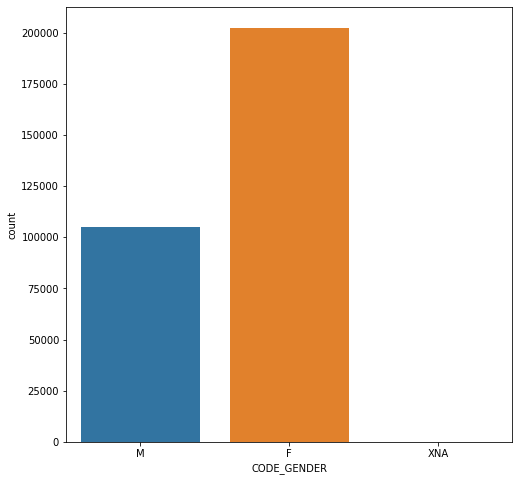

In [18]:
# від статі
sb.countplot(x='CODE_GENDER', data=train)

## Training

In [19]:
# факторизація - заміна рядків на числа
Xtraing = train.drop("TARGET", axis='columns') # прибираємо колонку таргет у Xtrain
Xtraing = Xtraing.apply(lambda col: pd.factorize(col, sort=True)[0])
Xtraing 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,1,0,1,0,1754,1191,4588,189,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,2064,4338,6985,704,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,0,338,228,662,30,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,1170,836,5680,145,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,1,0,1019,1635,3960,352,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,1,0,0,0,1407,612,5217,80,...,0,0,0,0,0,0,0,2,0,0
307507,307507,0,0,0,1,0,387,672,1792,80,...,0,0,0,0,0,0,0,2,0,0
307508,307508,0,0,0,1,0,1371,2270,5744,403,...,0,0,0,0,1,0,0,1,0,1
307509,307509,0,0,0,1,0,1519,1049,3593,161,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#беремо тільки target колонку
Ytraing = train[["TARGET"]]
Ytraing

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [21]:
Xtest = test
Xtest = Xtest.apply(lambda col: pd.factorize(col, sort=True)[0])
Xtest

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,1,0,272,1320,2344,276,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,181,379,1820,93,...,0,0,0,0,0,0,0,0,0,3
2,2,0,1,1,1,0,402,1548,7132,366,...,0,0,0,0,0,0,0,0,1,4
3,3,0,0,0,1,2,492,2731,6049,628,...,0,0,0,0,0,0,0,0,0,3
4,4,0,1,1,0,1,366,1456,4108,365,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739,0,0,0,1,0,243,903,1839,161,...,0,0,0,0,0,0,0,0,0,1
48740,48740,0,0,0,0,2,325,1452,4086,304,...,0,0,0,0,0,0,0,0,0,1
48741,48741,0,0,1,1,1,402,629,4257,195,...,0,0,0,0,0,0,0,0,3,1
48742,48742,0,1,0,0,0,434,998,3079,276,...,0,0,0,0,0,0,0,0,0,2


In [22]:
Xtraing, XtestNew, Ytraing, YtestNew = train_test_split(
    Xtraing, Ytraing, test_size = 0.33, random_state = 50
)
clf = SGDClassifier(verbose=True) #тренуємо модель
clf.fit(Xtraing, Ytraing) #X - input, Y - output

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-- Epoch 1
Norm: 64260.08, NNZs: 119, Bias: 3.883386, T: 206032, Avg. loss: 772629091.471723
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 52227.08, NNZs: 119, Bias: -3.366913, T: 412064, Avg. loss: 97266785.842042
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 47367.69, NNZs: 120, Bias: -6.488894, T: 618096, Avg. loss: 56558396.278317
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 46141.38, NNZs: 120, Bias: -8.531016, T: 824128, Avg. loss: 40192658.090702
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 44420.08, NNZs: 120, Bias: -9.855684, T: 1030160, Avg. loss: 31239207.165428
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 42646.33, NNZs: 120, Bias: -10.785849, T: 1236192, Avg. loss: 25530281.214927
Total training time: 0.57 seconds.
-- Epoch 7
Norm: 41570.67, NNZs: 120, Bias: -11.655486, T: 1442224, Avg. loss: 21450040.013799
Total training time: 0.66 seconds.
-- Epoch 8
Norm: 40848.02, NNZs: 120, Bias: -12.357622, T: 1648256, Avg. loss: 18690834.108048
Tota

SGDClassifier(verbose=True)

In [23]:
Predict = clf.predict(XtestNew)

## Results

In [24]:
roc_auc_score(YtestNew, Predict) #справжні та передбачені дані

0.6221778011102935

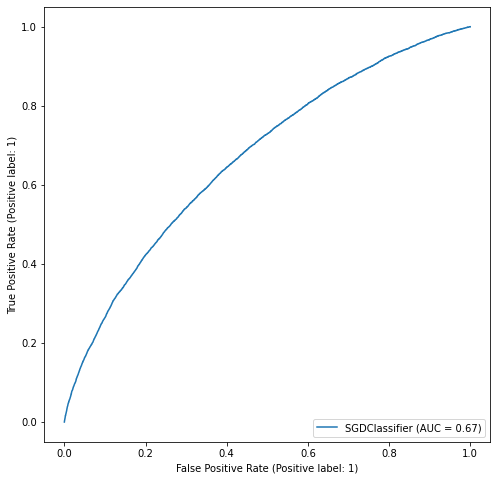

In [25]:
plot_roc_curve(clf, XtestNew, YtestNew) #крива росте вгору на кожному кроці якщо значення правильне, якщо ні - тільки вправо

## Saving submission

In [26]:
submission = pd.DataFrame() #по ID знаходимо дані і ставимо їм target, який ми передбачили
submission['SK_ID_CURR'] = test['SK_ID_CURR']
submission['TARGET'] = clf.predict(Xtest)
submission.to_csv('submission.csv', index=False)
submission.shape

(48744, 2)

In [27]:
submission[submission['SK_ID_CURR'] == 100001]

,SK_ID_CURR,TARGET
0,100001,0


## Submission

![](submission.jpg)